LOCO, AT version


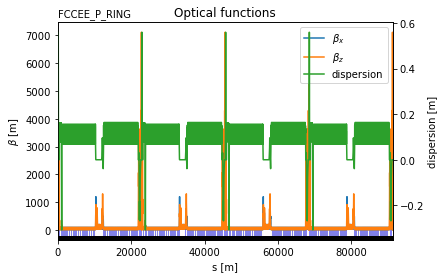

(<AxesSubplot:title={'left':'FCCEE_P_RING','center':'Optical functions'}, xlabel='s [m]', ylabel='$\\beta$ [m]'>,
 <AxesSubplot:ylabel='dispersion [m]'>,
 <AxesSubplot:>)

In [1]:
print(f"LOCO, AT version")
from at import *
from pylab import *
from at.load import load_mat
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import csv
from random import random
from copy import copy
from copy import deepcopy
from at import elements
from at_modules_loco import *
#ring=at.Lattice(ring1, energy=1)


ring = at.load_mat('fccee_t_v22_b_c.mat', key='ring')
ring.radiation_off()
ring.plot_beta()

In [2]:
t0_fullCode = time.time()

In [3]:
ring[54]

Sextupole('sy1r.1', 0.15, -6.581854935754305, NumIntSteps=40)

In [4]:
#Turn sextuplets off
sext_indexes = get_refpts(ring,at.elements.Sextupole)
for i in sext_indexes:
    ring[i].H=0

In [5]:
ring[54]

Sextupole('sy1r.1', 0.15, 0.0, NumIntSteps=40)

In [6]:
quad_indexes = get_refpts(ring, elements.Quadrupole)
quad_strengths_before =[]
for i in quad_indexes:
    quad_strengths = ring[i].K
    quad_strengths_before.append(quad_strengths)
    i +=1

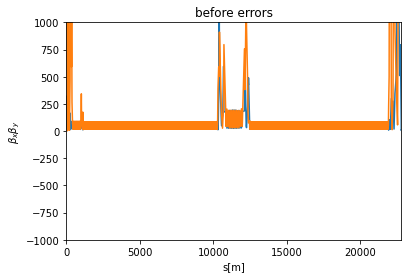

In [7]:
BPMs_random_noise = 0.0
twiss = getOptics(ring, at.elements.Monitor, BPMs_random_noise)
make_plot(twiss, 'before errors', 'before_errors', 0, 22793, -1000, 1000)

In [8]:
print("Choose Used correctors")
correctors_indexes = get_refpts(ring, elements.Corrector)
print("Total number of Correctors: ", len(correctors_indexes))
correctors_names = []
i=0
while(i<len(correctors_indexes)):
    correctors_names.append(ring[correctors_indexes[i]].FamName)
    i += 1

used_correctors= used_cor(166, correctors_names)

Choose Used correctors
Total number of Correctors:  3324


In [9]:
len(used_correctors)

21

In [10]:
used_correctors

['CXY4',
 'CXY1041',
 'CXY2135',
 'CXY3145',
 'CXY4239',
 'CXY5280',
 'CXY6314',
 'CXY7412',
 'CXY8418',
 'CXY9516',
 'CXY10559',
 'CXY11587',
 'CXY12685',
 'CXY13691',
 'CXY14789',
 'CXY15838',
 'CXY16864',
 'CXY17958',
 'CXY18968',
 'CXY20062',
 'CXY21117']

In [11]:
print("Choose Used Quadrpoles Families")

Choose Used Quadrpoles Families


QF
IP0, IP1: 8 QFG2, 179 QF2, 173 QF4
IP2, IP3: 8 QFG2, 179 QF2, 173 QF4
IP4, IP5: 8 QFG2, 179 QF2, 173 QF4
IP6, IP7: 8 QFG2, 179 QF2, 173 QF4
QD
IP0, IP1: 8 QDG1, 179 QD1, 173 QD3
IP2, IP3: 8 QDG1, 179 QD1, 173 QD3
IP4, IP5: 8 QDG1, 179 QD1, 173 QD3
IP6, IP7: 8 QDG1, 179 QD1, 173 QD3

In [12]:
qf_indexes = get_refpts(ring,'QF*')
qd_indexes = get_refpts(ring,'QD*')
qfg_indexes = get_refpts(ring,'QFG*')
qdg_indexes = get_refpts(ring,'QDG*')
qf2_indexes = get_refpts(ring,'QF2*')
qd1_indexes = get_refpts(ring,'QD1*')
qf4_indexes = get_refpts(ring,'QF4*')
qd3_indexes = get_refpts(ring,'QD3*')
print("# of QDG1:", len(qdg_indexes), '# of QFG2:', len(qfg_indexes), '# of QD1:', len(qd1_indexes), '# of QF2:', len(qf2_indexes), '# of QD3:', len(qd3_indexes), '# of QF4:', len(qf4_indexes))

# all_quads_names
quad_info_ = quad_info(ring)
quad_dict, quad_vals = getQuadFamilies(quad_info_)
all_quads_names = [k for k in quad_dict.keys()]

# choosing the used Quads families
qdg1_names =[]
qfg2_names =[]
qd1_names= []
qf2_names = []
qd3_names = []
qf4_names = []
for i in all_quads_names:
    if i.startswith('qdg'):
       qdg1_names.append(i)
    if i.startswith('qfg'):
       qfg2_names.append(i)
    if i.startswith('qd1'):
       qd1_names.append(i)
    if i.startswith('qf2'):
       qf2_names.append(i)
    if i.startswith('qd3'):
       qd3_names.append(i)
    if i.startswith('qf4'):
       qf4_names.append(i)
used_qf4 = [qf4_names[x:x+7] for x in range(0, len(qf4_names), 7)] #720
used_qd1 = [qd1_names[x:x+7] for x in range(0, len(qd1_names), 7)]
used_qf2 = [qf2_names[x:x+7] for x in range(0, len(qf2_names), 7)]
used_qd3 = [qd3_names[x:x+7] for x in range(0, len(qd3_names), 7)]


used_qf4_ind = [qf4_indexes[x:x+7] for x in range(0, len(qf4_indexes), 7)]
used_qd1_ind = [qd1_indexes[x:x+7] for x in range(0, len(qd1_indexes), 7)]
used_qf2_ind = [qf2_indexes[x:x+7] for x in range(0, len(qf2_indexes), 7)]
used_qd3_ind = [qd3_indexes[x:x+7] for x in range(0, len(qd3_indexes), 7)]

print(len(used_qf4))
used_quadrpoles_families = used_qd1+used_qf2+used_qd3+used_qf4
used_quadrpoles_families_ind = used_qd1_ind+used_qf2_ind+used_qd3_ind+used_qf4_ind
print(len(used_quadrpoles_families))
print(len(used_quadrpoles_families_ind))

# of QDG1: 36 # of QFG2: 40 # of QD1: 720 # of QF2: 720 # of QD3: 700 # of QF4: 696
100
406
406


Execution time: 37.61286115646362 sec
(21, 3324)


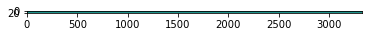

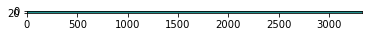

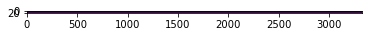

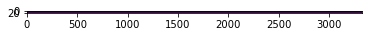

In [13]:
t0 = time.time()
Cxx, Cxy= ORM_x(1.e-6, ring, BPMs_random_noise, used_correctors)
t1 = time.time()
print(f"Execution time: {t1-t0} sec")
Cyy, Cyx= ORM_y(1.e-6, ring, BPMs_random_noise, used_correctors)
print(shape(Cxx))
plotORM(Cxx, 'Cxx')
plotORM(Cyy, 'Cyy')
plotORM(Cyx, 'Cyx')
plotORM(Cxy, 'Cxy')

In [14]:
Cxy

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [15]:
Cyx

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [16]:
dk =1.e-06

t0 = time.time()

C0x, C0y, C0xy, C0yx, dCx, dCy, dCxy,dCyx  = generatingQuadsResponse(ring, dk, Cxx, Cyy,Cxy, Cyx,BPMs_random_noise, used_quadrpoles_families_ind, CfamilyNames= used_correctors)

t1 = time.time()
print(f"Execution time: {t1-t0} sec")

generating response to family  1
Execution time: 73.44821977615356 sec
generating response to family  2
Execution time: 73.67035841941833 sec
generating response to family  3
Execution time: 68.66501879692078 sec
generating response to family  4
Execution time: 68.58329319953918 sec
generating response to family  5
Execution time: 68.27705526351929 sec
generating response to family  6
Execution time: 68.26747059822083 sec
generating response to family  7
Execution time: 68.49744176864624 sec
generating response to family  8
Execution time: 68.67897248268127 sec
generating response to family  9
Execution time: 68.44534230232239 sec
generating response to family  10
Execution time: 68.35955023765564 sec
generating response to family  11
Execution time: 74.19050598144531 sec
generating response to family  12
Execution time: 63.80456900596619 sec
generating response to family  13
Execution time: 62.552475452423096 sec
generating response to family  14
Execution time: 62.2676739692688 sec
g

In [17]:
gradErr = 1.e-3

simulateRandomGradientErrors(ring, gradErr,used_quadrpoles_families_ind, debug=False)

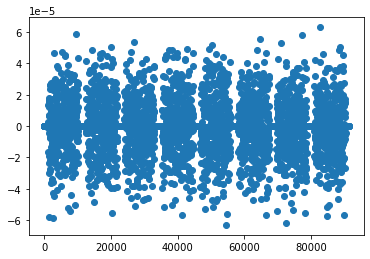

In [18]:
quad_indexes = get_refpts(ring, elements.Quadrupole)
elements_indexes = get_refpts(ring, '*')
opt = at.linopt(ring, refpts=quad_indexes, get_chrom=True)
s_pos_q = opt[3].s_pos
quad_strengths_after =[]
for i in quad_indexes:
    quad_strengths = ring[i].K
    quad_strengths_after.append(quad_strengths)

plt.scatter(s_pos_q, np.array(quad_strengths_before)- np.array(quad_strengths_after))

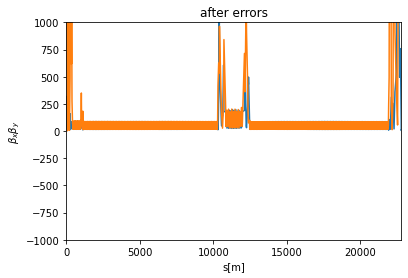

In [19]:
twiss_err = getOptics(ring, at.elements.Monitor, BPMs_random_noise ) #####
make_plot(twiss_err, 'after errors', 'after_errors', 0, 22793, -1000, 1000)

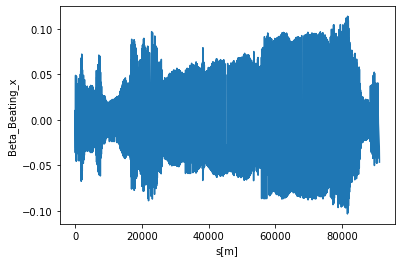

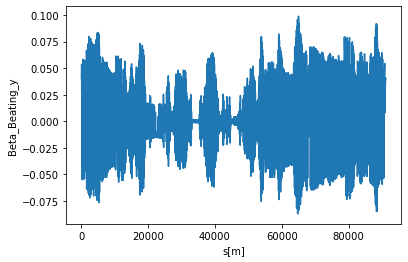

RMS beta beat, x:5.132876686079767%   y: 3.7894114018765785%
STD beta beat, x:5.131092666734059%   y: 3.7818214720294807%


In [20]:
bx_rms1, by_rms1 = getBetaBeat(twiss, twiss_err,'dp_x_err' , 'db_y_err')

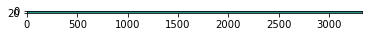

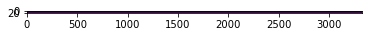

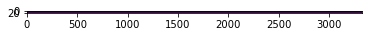

In [21]:
Cxx1, Cxy1= ORM_x(1.e-6, ring, BPMs_random_noise, used_correctors)
Cyy1, Cyx1= ORM_y(1.e-6, ring, BPMs_random_noise, used_correctors)

plotORM(Cxx1, 'Cxx')
plotORM(Cxy1, 'Cxy')
plotORM(Cyx1, 'Cyx')

iteration0:
beta beating with errors


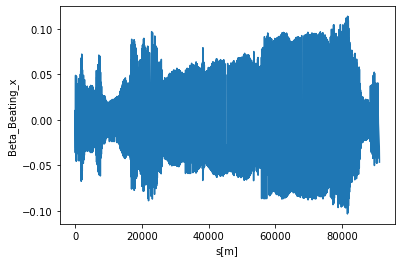

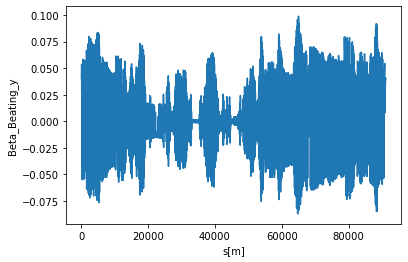

RMS beta beat, x:5.132876686079767%   y: 3.7894114018765785%
STD beta beat, x:5.131092666734059%   y: 3.7818214720294807%
beta beating after corrections


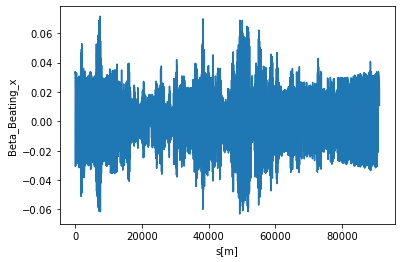

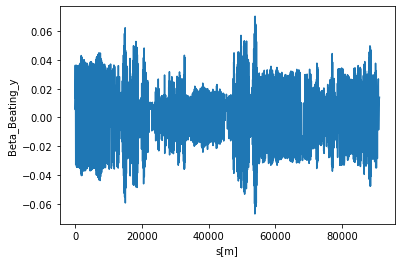

RMS beta beat, x:2.2575095271017713%   y: 2.1649631023079765%
STD beta beat, x:2.256079245218434%   y: 2.1637503930147393%
betax_correction reduction 56.01862921772345
betax_correction reduction 42.868090246526116
iteration1:
beta beating with errors


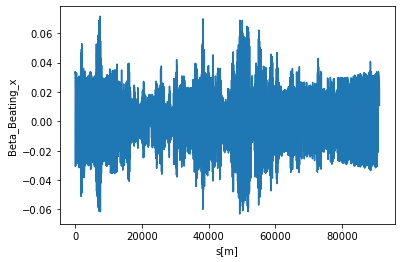

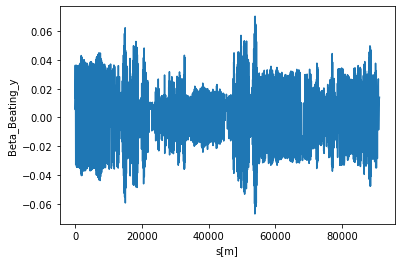

RMS beta beat, x:2.2575095271017713%   y: 2.1649631023079765%
STD beta beat, x:2.256079245218434%   y: 2.1637503930147393%
beta beating after corrections


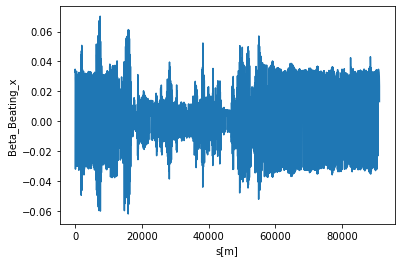

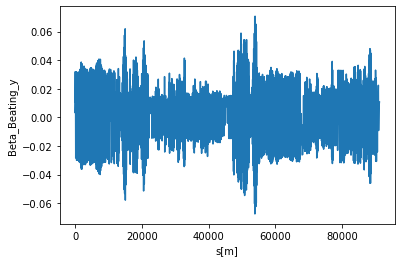

RMS beta beat, x:2.2460603273313002%   y: 2.0479179164559853%
STD beta beat, x:2.2439461792237267%   y: 2.046394600750988%
betax_correction reduction 0.5071606402108908
betax_correction reduction 5.406336289390534
iteration2:
beta beating with errors


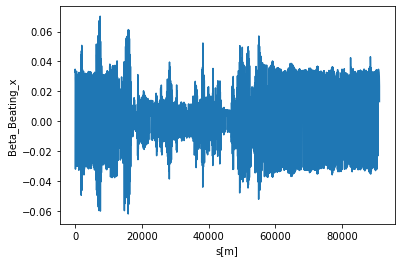

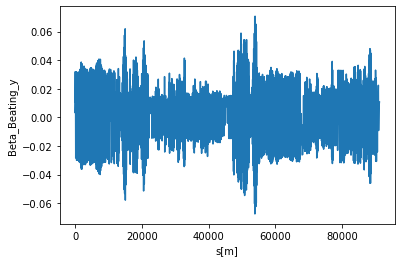

RMS beta beat, x:2.2460603273313002%   y: 2.0479179164559853%
STD beta beat, x:2.2439461792237267%   y: 2.046394600750988%
beta beating after corrections


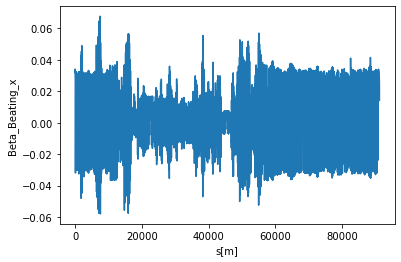

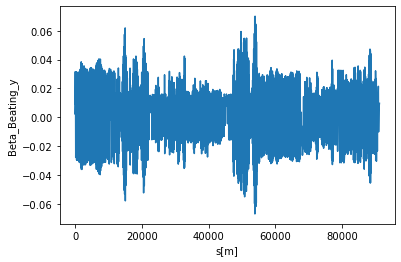

RMS beta beat, x:2.225413844613839%   y: 2.0494448666602025%
STD beta beat, x:2.2233279397899044%   y: 2.047936822228748%
betax_correction reduction 0.9192309959898948
betax_correction reduction -0.07456110383856629
iteration3:
beta beating with errors


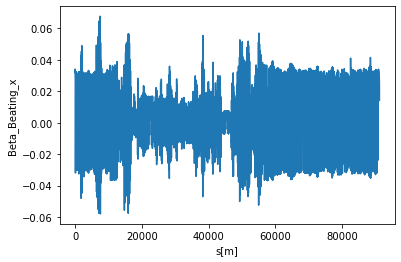

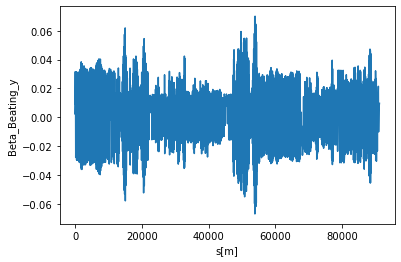

RMS beta beat, x:2.225413844613839%   y: 2.0494448666602025%
STD beta beat, x:2.2233279397899044%   y: 2.047936822228748%
beta beating after corrections


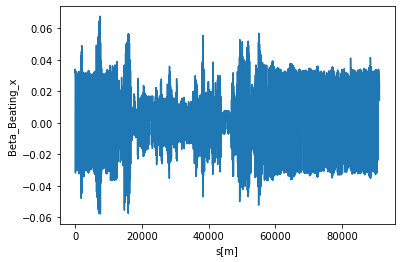

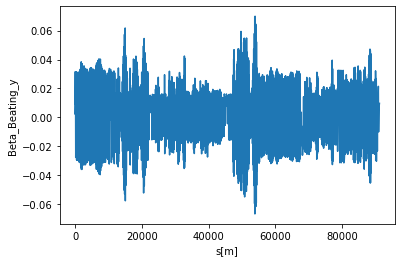

RMS beta beat, x:2.2229337795471924%   y: 2.0491891315318074%
STD beta beat, x:2.220852371073771%   y: 2.047679623825222%
betax_correction reduction 0.11144287039684952
betax_correction reduction 0.012478263385140576
iteration4:
beta beating with errors


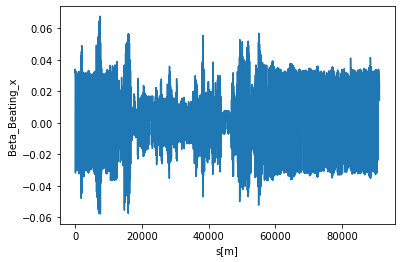

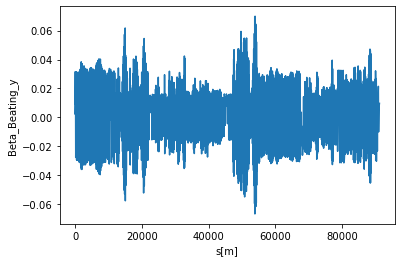

RMS beta beat, x:2.2229337795471924%   y: 2.0491891315318074%
STD beta beat, x:2.220852371073771%   y: 2.047679623825222%
beta beating after corrections


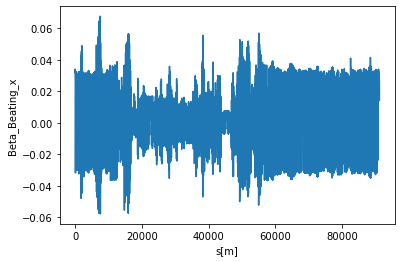

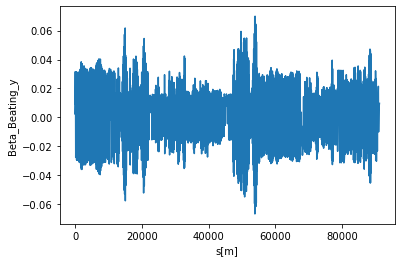

RMS beta beat, x:2.2229265717476023%   y: 2.0491946764622395%
STD beta beat, x:2.2208451122059336%   y: 2.0476851754205003%
betax_correction reduction 0.0003242471573572381
betax_correction reduction -0.0002705914425860101


In [22]:
numberOfIteration = 5
for x in range(numberOfIteration):
    print('iteration'+str(x) +':')
    twiss_error0 = getOptics(ring, at.elements.Monitor, BPMs_random_noise)
    Cxx1, Cxy1= ORM_x(1.e-6, ring, BPMs_random_noise, used_correctors)
    Cyy1, Cyx1= ORM_y(1.e-6, ring, BPMs_random_noise, used_correctors)
    A, B = defineMatrices(C0x, C0y, C0xy, C0yx, Cxx1, Cyy1, Cxy1, Cyx1, dCx, dCy, dCxy,dCyx)
    dk = len(dCx)
    cut = 406
    Ai, r, e = getInverse(A, B,dk, cut)
    #print("r................", r)
    setCorrection(ring, r , used_quadrpoles_families_ind, used_quadrpoles_families)
    twiss_corrected = getOptics(ring, at.elements.Monitor, BPMs_random_noise)
    print('beta beating with errors')
    bx_rms1, by_rms1 = getBetaBeat(twiss, twiss_error0,'dp_x_err' , 'db_y_err')
    print('beta beating after corrections')
    bx_rms2, by_rms2= getBetaBeat(twiss, twiss_corrected, 'dp_x_corrected' , 'db_y_corrected')
    print('betax_correction reduction', (1-bx_rms2/bx_rms1)*100)
    print('betax_correction reduction', (1-by_rms2/by_rms1)*100)
    #Cxx2, Cxy2= ORM_x(1.e-6, ring, BPMs_random_noise, CfamilyNames = used_correctors_ind)
    #Cyy2, Cyx2= ORM_y(1.e-6, ring, BPMs_random_noise, CfamilyNames = used_correctors_ind)

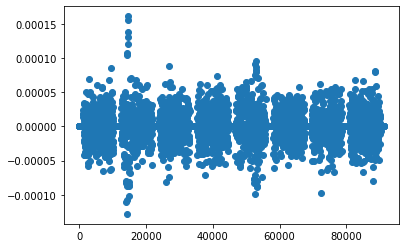

In [23]:
quad_indexes = get_refpts(ring, elements.Quadrupole)
elements_indexes = get_refpts(ring, '*')
opt = at.linopt(ring, refpts=quad_indexes, get_chrom=True)
s_pos_q = opt[3].s_pos
quad_strengths_after =[]
for i in quad_indexes:
    quad_strengths = ring[i].K
    quad_strengths_after.append(quad_strengths)

plt.scatter(s_pos_q, np.array(quad_strengths_before)- np.array(quad_strengths_after))

In [24]:
t1_fullCode = time.time()
print(f"Execution time: {t1_fullCode-t0_fullCode} sec")

Execution time: 35716.649641513824 sec
